
##Linear Regression_Ecommerce_Company
an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

In [47]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Customer info :
Email, Address, and their color Avatar. 
Then it also has numerical value columns:
####Avg. Session Length: Average session of in-store style advice sessions.
####Time on App: Average time spent on App in minutes
####Time on Website: Average time spent on Website in minutes
####Length of Membership: How many years the customer has been a member.

In [48]:
customers = pd.read_csv("Ecommerce Customers")

In [49]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [50]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


###Exploratory Data Analysis

In [51]:
##Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

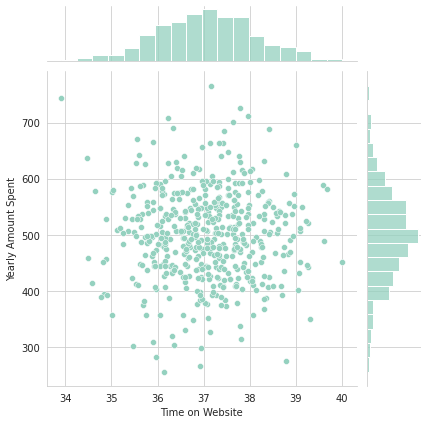

In [52]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

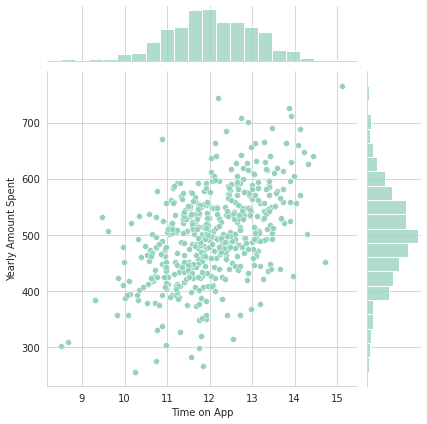

In [53]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

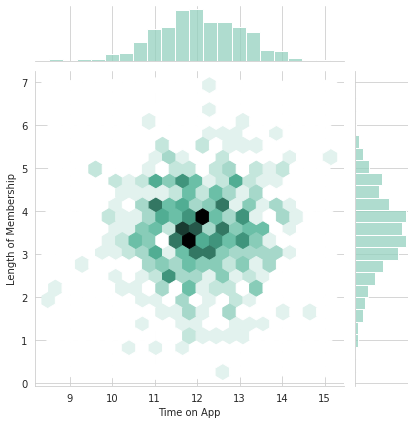

In [54]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

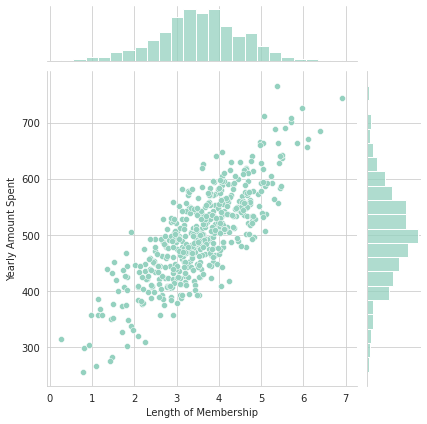

In [55]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',kind='scatter',data=customers)

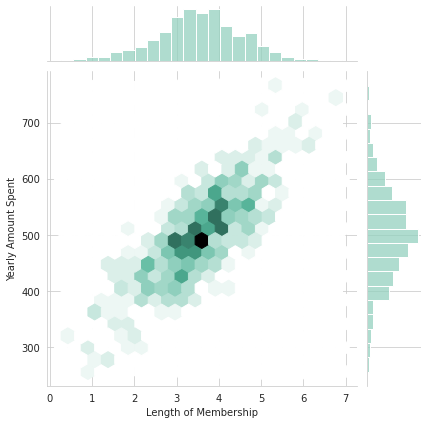

In [56]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',kind='hex',data=customers)

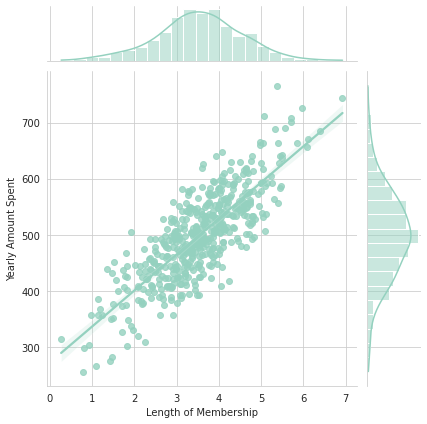

In [57]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',kind='reg',data=customers)

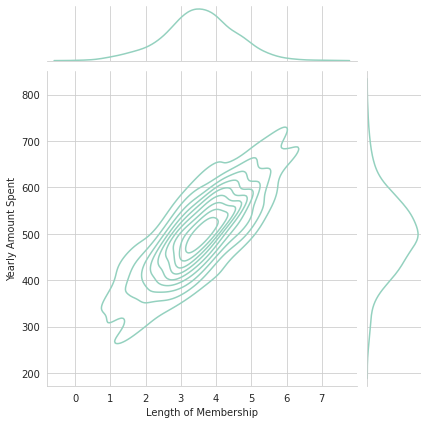

In [58]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',kind='kde',data=customers)

**Let's explore these types of relationships across the entire data set**

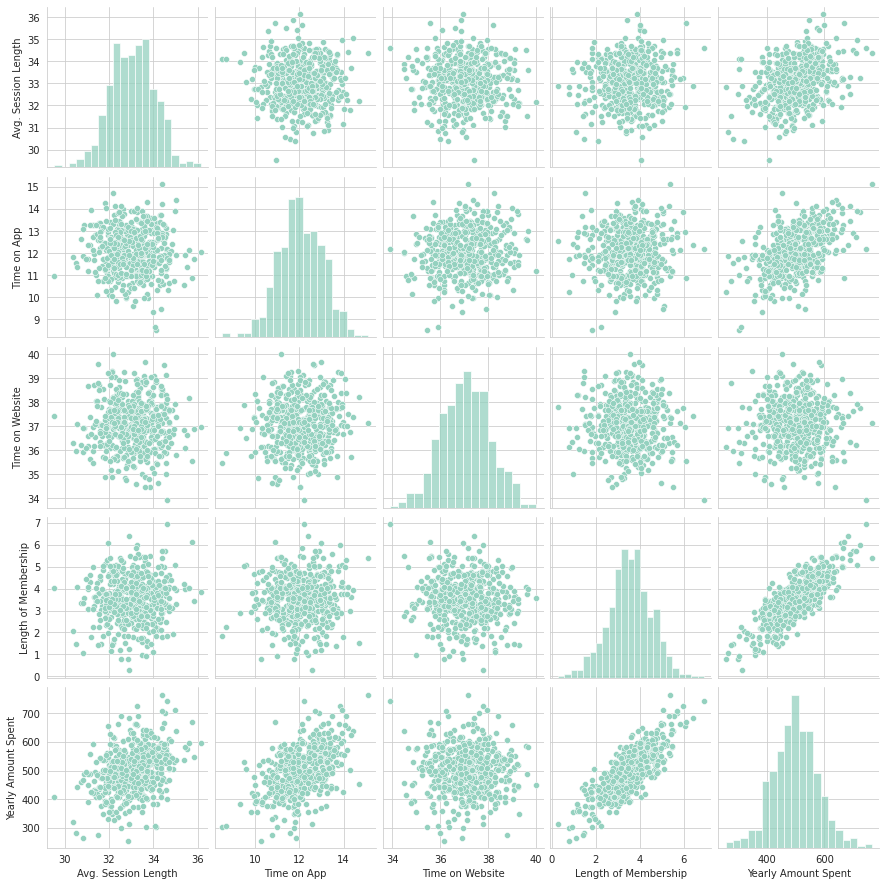

In [59]:
sns.pairplot(customers)

Based off this plot Length of Membership looks to be the most correlated feature with Yearly Amount Spent

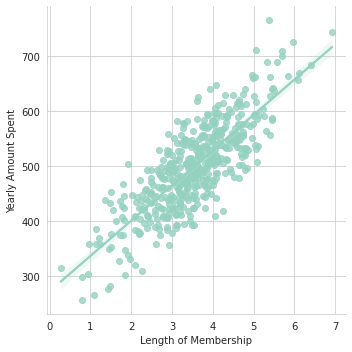

In [60]:
##Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

Training and Testing Data

In [61]:
y = customers['Yearly Amount Spent']

In [62]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [65]:
##Training the Model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [66]:
lm.fit(X_train,y_train)

LinearRegression()

In [67]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [68]:
# The interceptor
print('Interceptor: \n', lm.intercept_)

Interceptor: 
 -1047.9327822502391


In [69]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

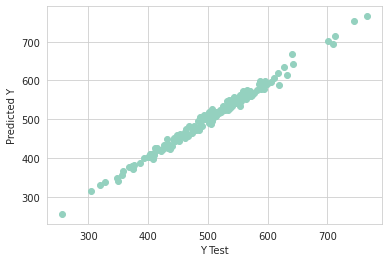

In [70]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

##Evaluating the Model
Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [71]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


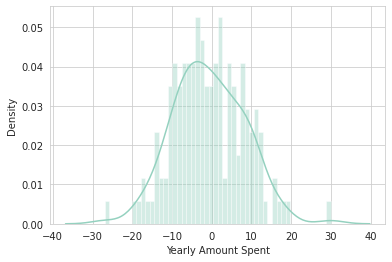

In [72]:
##Residuals
##Plot a histogram of the residuals and make sure it looks normally distributed
sns.distplot((y_test-predictions),bins=50);

the density increase when the values(ytest-predictions) are near to 0 ==> normally distributed
==>everything is ok with our data.

do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.


In [73]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**

**Do you think the company should focus more on their mobile app or on their website?**

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!
